In [1]:
from project.gen_data import gen_data
from project.post_processing import Plotter

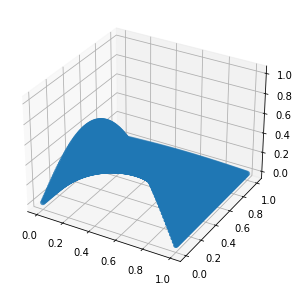

In [2]:
import matplotlib.pyplot as plt

data_dict = {
    "x_range": (0, 1),
    "t_range": (0, 1),
    "x_dim": 100,
    "t_dim": 100,
    "a_coeff": 0.4,
    "frequency": 1,
}

X_gen, y_gen = gen_data("heat_1d_boundary_sin_exact", data_dict)
Plotter(1,1).plot_2d_y(X_gen, y_gen)
plt.show()

First thing we will do is to double check whether the same multiple layer model of relu works as the previous parameters do.
{'activation': 'relu', 'hidden_layer_sizes': (150, 200, 150, 150)}

Current a = 0.1, accuracy = 0.99980


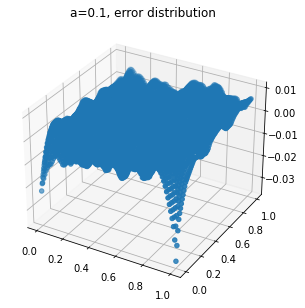

Current a = 0.3, accuracy = 0.99988


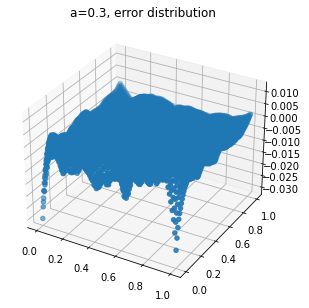

Current a = 0.5, accuracy = 0.99989


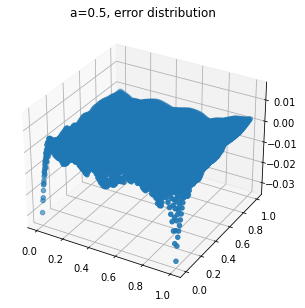

Current a = 0.7, accuracy = 0.99967


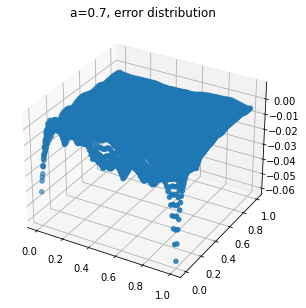

Current a = 0.9, accuracy = 0.99966


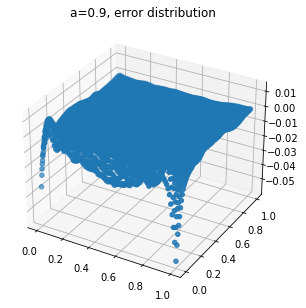

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

for a in [0.1, 0.3, 0.5, 0.7, 0.9]:
    data_dict = {
    "x_range": (0, 1),
    "t_range": (0, 1),
    "x_dim": 100,
    "t_dim": 100,
    "a_coeff": a,
    "frequency": 1,
    }
    X_gen, y_gen = gen_data("heat_1d_boundary_sin_exact", data_dict)
    X_train, X_test, y_train, y_test = train_test_split(X_gen, y_gen.ravel())
    regr = MLPRegressor(hidden_layer_sizes = (150, 200, 150, 150),activation='relu').fit(X_train, y_train)
    
    print("Current a = {}, accuracy = {:.5f}".format(a, metrics.explained_variance_score(y_test, regr.predict(X_test))))
    
    Plotter(1,1).plot_2d_y(X_gen, y_gen-regr.predict(X_gen).reshape(y_gen.shape))
    plt.title("a={}, error distribution".format(a))
    plt.show()

Appearantly this methods works well and the model we have is universal for existing problem. The issue is on the boundary conditions so I think it should have something mathmatically but we don't care in general